In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel(r"C:\Users\Aishwarya\Desktop\ExcelR\Day 17 - Clustering introduction, Hierarchical clustering\Universities.xlsx")
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
x = df.drop(columns=['Univ'])
x

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [5]:
x = sc.fit_transform(x)
x

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [6]:
from scipy.cluster import hierarchy

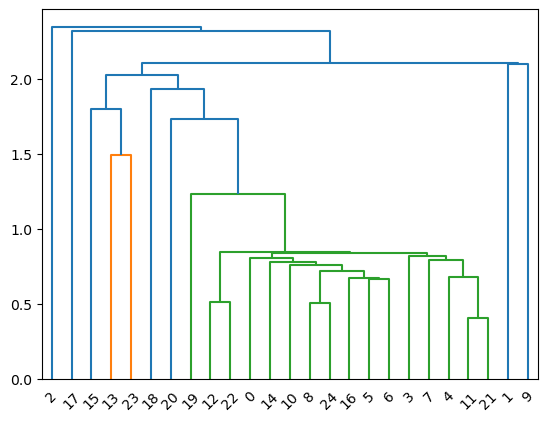

In [7]:
lk = hierarchy.linkage(x)
dendrogram = hierarchy.dendrogram(lk)

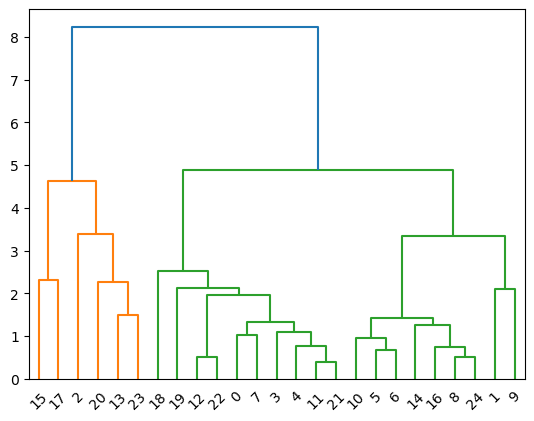

In [8]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
hc = AgglomerativeClustering(n_clusters=4)
y = hc.fit_predict(x)

In [12]:
y

array([0, 2, 0, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 3], dtype=int64)

In [13]:
df['Cluster'] = y

In [14]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,3
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [15]:
df.groupby('Cluster').agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429


In [16]:
df[df['Cluster']==2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
1,CalTech,1415,100,25,6,63575,81,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [17]:
df[df['Cluster']==1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


C:\Users\Aishwarya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


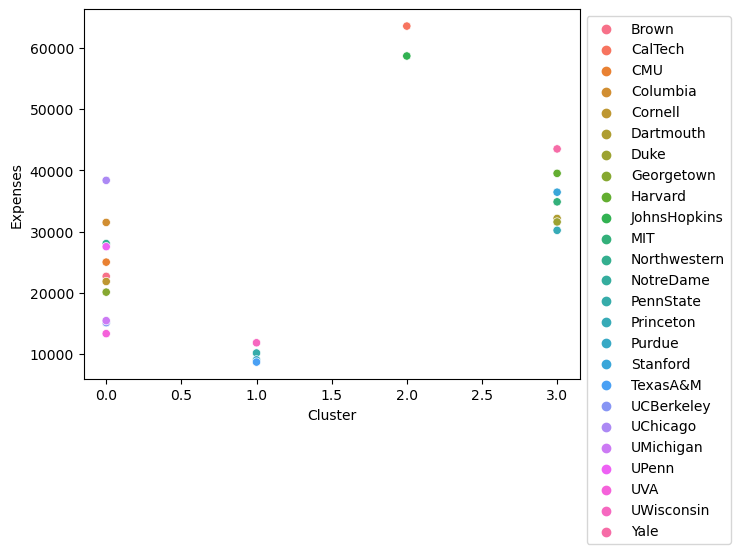

In [26]:
import seaborn as sns

sns.scatterplot(df['Cluster'],df['Expenses'],hue=df['Univ'])
plt.legend(bbox_to_anchor = (1,1))